# Import Libararies

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Getting Data and sorting that according to date

In [37]:
A = pd.read_csv("AAPL.csv")
M = pd.read_csv("MSFT.csv")
print(A.info())
print(M.info())
A = A.sort_values(by='Date')
M = M.sort_values(by='Date')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      22 non-null     object 
 1   Price     22 non-null     float64
 2   Open      22 non-null     float64
 3   High      22 non-null     float64
 4   Low       22 non-null     float64
 5   Vol.      22 non-null     object 
 6   Change %  22 non-null     object 
dtypes: float64(4), object(3)
memory usage: 1.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      22 non-null     object 
 1   Price     22 non-null     float64
 2   Open      22 non-null     float64
 3   High      22 non-null     float64
 4   Low       22 non-null     float64
 5   Vol.      22 non-null     object 
 6   Change %  22 non-null     object 
dtypes: float64(4), object(3)
memory 

# Taking input from User

In [38]:
n = input("Enter the price feature you want: \n 1. Price \n 2. High \n 3. Low \n ")
if n == "1" :
  s = "Price"
elif n == "2":
  s = "High"
elif n == "3":
  s = "Low"
else:
  s = "Error, Enter correct value from 1,2,3..." 
print(s)

Enter the price feature you want: 
 1. Price 
 2. High 
 3. Low 
 1
Price


# Calaculating the mean, variance and Correralation coefficient

In [48]:
i = A.columns.get_loc(s)
p1 = A.iloc[:,i].values
p2 = M.iloc[:,i].values
#p1 = [float(x) for x in s1]
#p2 = [float(x) for x in s2]
print(p1)
print(p2)
r1 = []
r2 = []
for i in range(len(p1)-1):
  r1.append((p1[i+1]-p1[i])/p1[i])
  r2.append((p2[i+1]-p2[i])/p2[i])
print(r1,len(r1))
print(r2,len(r2))

[164.77 163.76 161.84 165.32 171.18 175.08 174.56 179.45 175.74 174.33
 179.3  172.26 171.14 169.75 172.99 175.64 176.28 180.33 179.29 179.38
 178.2  177.57]
[330.08 329.49 323.01 326.19 334.92 334.97 333.1  342.54 339.4  328.34
 334.65 324.9  323.8  319.91 327.29 333.2  334.69 342.45 341.25 341.95
 339.32 336.32]
[-0.00612975663045469, -0.011724474841230995, 0.021502718734552582, 0.03544640696830398, 0.022783035401331964, -0.0029700708247658797, 0.028013290559119993, -0.02067428252995252, -0.0080232161147149, 0.028509149314518433, -0.03926380368098171, -0.006501799605247908, -0.008122005375715708, 0.0190868924889544, 0.015318804555176467, 0.0036438168982009496, 0.022974812797821712, -0.005767204569400657, 0.0005019800323498434, -0.006578213847697663, -0.00353535353535351] 21
[-0.0017874454677653145, -0.019666757716470966, 0.009844896442834608, 0.02676354272050038, 0.00014928938253914775, -0.005582589485625592, 0.028339837886520555, -0.009166812635020853, -0.03258691809074839, 0.019217

In [49]:
EA = np.mean(r1)
EM = np.mean(r2)
VA = np.var(r1)
VM = np.var(r2)
C = np.corrcoef(r1,r2)
C = C[0][1]
print(EA,EM)
print(VA,VM)
print(C)

0.0037376536283244845 0.0010375848497060061
0.0003379499212105069 0.00029068735185978364
0.8759828902224545


# Calculating Mu and Sigma^2

In [56]:
mu = []
sig = []
d = 40
i = 0.025
w = 0
for i in range(d):
  x = w * EA + (1-w) * EM
  y = w**2 * VA + (1-w)**2 * VM + 2*w*(1-w)*C*np.sqrt(VA)*np.sqrt(VM)
  mu.append(x)
  sig.append(y)
  w = w + i
print(mu)
print(sig) 


[0.0010375848497060061, 0.0010375848497060061, 0.0037376536283244845, 0.00913779118556144, 0.017237997521416876, 0.02803827263589079, 0.041538616528983184, 0.057739029200694056, 0.07663951065102341, 0.09824006087997124, 0.12254067988753753, 0.14954136767372234, 0.1792421242385256, 0.21164294958194735, 0.24674384370398755, 0.28454480660464626, 0.3250458382839234, 0.36824693874181913, 0.41414810797833324, 0.46274934599346584, 0.514050652787217, 0.5680520283595865, 0.6247534727105745, 0.684154985840181, 0.7462565677484061, 0.8110582184352495, 0.8785599379007116, 0.9487617261447919, 1.0216635831674907, 1.0972655089688081, 1.175567503548744, 1.2565695669072985, 1.3402716990444712, 1.4266738999602626, 1.5157761696546725, 1.6075785081277005, 1.7020809153793475, 1.7992833914096127, 1.8991859362184962, 2.0017885498059984]
[0.00029068735185978364, 0.00029068735185978364, 0.0003379499212105069, 0.0009095969060928456, 0.0029598719988685844, 0.007920140738080401, 0.01769889050845183, 0.034681730540

# Plotting Mu and Sigma^2

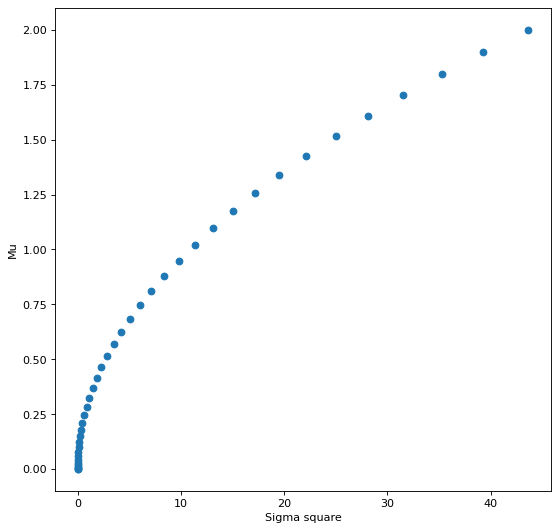

In [60]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(sig,mu)
plt.xlabel("Sigma square")
plt.ylabel("Mu")
plt.show()

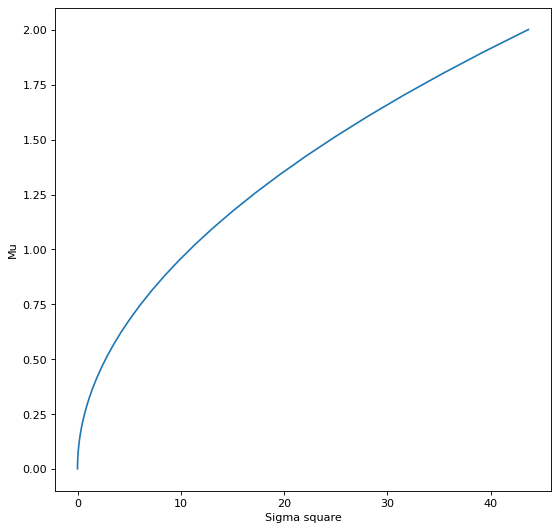

In [61]:
plt.figure(figsize=(8, 8), dpi=80)
plt.plot(sig,mu)
plt.xlabel("Sigma square")
plt.ylabel("Mu")
plt.show()